<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

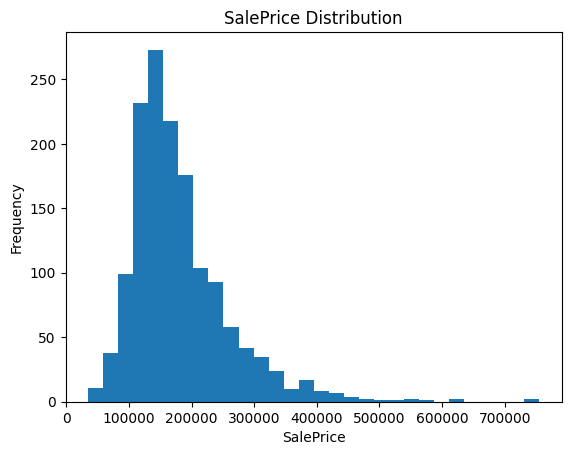

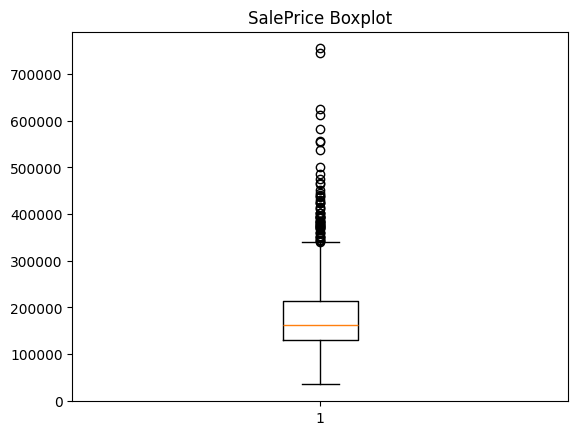

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('house_prices.csv')
df.shape
df.info()
df.head()
df.describe()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)
plt.hist(df['SalePrice'], bins=30)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()
plt.boxplot(df['SalePrice'])
plt.title("SalePrice Boxplot")
plt.show()
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
outliers.shape
df['SalePrice_outlier'] = ((df['SalePrice'] < lower_bound) |
                           (df['SalePrice'] > upper_bound))
df['SalePrice_outlier'].value_counts()
df_cleaned = df[~df['SalePrice_outlier']]
df['SalePrice_capped'] = np.where(
    df['SalePrice'] > upper_bound, upper_bound,
    np.where(df['SalePrice'] < lower_bound, lower_bound, df['SalePrice'])
)
corr = df.select_dtypes(include=np.number).corr()
corr
corr['SalePrice'].sort_values(ascending=False)
df_cleaned.to_csv("cleaned_dataset.csv", index=False)


